# Text Classification using RNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer

In [2]:
df = pd.read_csv(r'C:\Users\yudha\Documents\UGM\Kuliah\Semester7\Data Mining dan Kecerdasan Bisnis\Tugas 3\financetweets.csv')
df1 = pd.read_csv(r'C:\Users\yudha\Documents\UGM\Kuliah\Semester7\Data Mining dan Kecerdasan Bisnis\Tugas 3\sportstweets.csv')
df2 = pd.read_csv(r'C:\Users\yudha\Documents\UGM\Kuliah\Semester7\Data Mining dan Kecerdasan Bisnis\Tugas 3\entertainmenttweets.csv')
#iky = apep[apep['Geographic Area'] == 'Indonesia']


C:\Users\yudha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(list(df.columns))

['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date']


In [4]:
ent = df2[['tweet']].iloc[:30000]
lenent = len(ent.index)
spo = df1[['tweet']].iloc[:20000]
lenspo = len(spo.index)
fin = df[['tweet']].iloc[:50000]
lenfin = len(fin.index)
data = fin.append(ent, ignore_index = True)
data = data.append(spo, ignore_index = True)
data

,tweet
0,Pemerintah mengeluarkan aturan baru terkait te...
1,"""Apalagi porsinya sedikit bahkan saya dengan t..."
2,Rumah kos-kosan dengan tipe kamar 2x1 meter di...
3,Menhub Budi Karya Sumadi mengatakan akan membu...
4,Rumah kos-kosan dengan tipe kamar 2x1 meter di...
5,Kementan sebut keberhasilan pembangunan sektor...
6,Kos-kosan berukuran 2x1 M di Jakarta baru-baru...
7,Hunian berbentuk kotak atau yang biasa dikenal...
8,"""Lebih baik selesaikan masalah defisit BPJS Ke..."
9,"""Pak Luhut mau mempercepat Perpres kendaraan l..."


## Labelling

In [5]:
label = []
for i in range(lenfin):
    label.append('finance')
for i in range(lenent):
    label.append('entertainment')
for i in range(lenspo):
    label.append('sports')
print(label)

['finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance', 'finance'

In [6]:
panjangsatu = 0
for i in label:
    if i=='finance':
        panjangsatu += 1
print(panjangsatu)

50000


In [7]:
data['label'] = label
data

,tweet,label
0,Pemerintah mengeluarkan aturan baru terkait te...,finance
1,"""Apalagi porsinya sedikit bahkan saya dengan t...",finance
2,Rumah kos-kosan dengan tipe kamar 2x1 meter di...,finance
3,Menhub Budi Karya Sumadi mengatakan akan membu...,finance
4,Rumah kos-kosan dengan tipe kamar 2x1 meter di...,finance
5,Kementan sebut keberhasilan pembangunan sektor...,finance
6,Kos-kosan berukuran 2x1 M di Jakarta baru-baru...,finance
7,Hunian berbentuk kotak atau yang biasa dikenal...,finance
8,"""Lebih baik selesaikan masalah defisit BPJS Ke...",finance
9,"""Pak Luhut mau mempercepat Perpres kendaraan l...",finance


## Data Shuffling

In [8]:
orig = data.sample(frac=1).reset_index(drop=True)
orig

,tweet,label
0,Lewandowski sekarang menjadi pemain asing ters...,sports
1,"Ketua MPR, Zulkifli Hasan, para sahabat serta ...",entertainment
2,Polemik Pertemuan IMF-Bank Dunia http://detik...,finance
3,"Setelah menjadi mualaf, Deddy Corbuzier juga d...",entertainment
4,Pemerintah Kejar Target 1 Juta Rumah http://d...,finance
5,Trans TV kembali menayangkan drama Korea favor...,entertainment
6,Pelatih asal Serbia itu sebelumnya mengatakan ...,sports
7,Zac Efron tampil beda saat menghadiri acara Su...,entertainment
8,"Suami Lucinta Luna, Bigham membuat pengakuan k...",entertainment
9,"#MostPopular Dianggap Judi, Mesir Haramkan Bit...",finance


## Data cleansing

In [9]:
tweets = orig["tweet"].values
labels = orig['label'].values
print (tweets[0:10], labels[0:10])

['Lewandowski sekarang menjadi pemain asing tersubur sepanjang masa Bundesliga   1️⃣ Robert Lewandowski 197  2️⃣ Claudio Pizarro 195  3️⃣ Giovane Elber 133  4️⃣ Vedad Ibisevic 119  5️⃣ Ailton 106 pic.twitter.com/F4I5AgYQHO'
 'Ketua MPR, Zulkifli Hasan, para sahabat serta anak-anak ustaz Arifin Ilham sudah menunggu di Bandara Halim Perdana Kusuma. https://hot.detik.com/celeb/d-4562373/ketua-mpr-dan-anak-anak-jemput-jenazah-ustaz-arifin-ilham-di-bandara-halim?utm_term=echobox&utm_campaign=detikcomsocmed&utm_medium=oa&utm_content=detikhot&utm_source=Twitter#Echobox=1558600788\xa0…'
 'Polemik Pertemuan IMF-Bank Dunia  http://detik.id/6991Qc\xa0'
 'Setelah menjadi mualaf, Deddy Corbuzier juga dikabarkan akan mengganti namanya. Gus Miftah sudah memanggilnya Ahmad Dedy Cahyadi. Benarkah Deddy sudah memutuskan untuk nama barunya? #DeddyCorbuzier https://hot.detik.com/celeb/d-4598004/dipanggil-ahmad-dedy-cahyadi-deddy-corbuzier-masih-pilih-nama?utm_content=detikhot&utm_term=echobox&utm_medium=o

In [10]:
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',user_removed)
    number_removed = re.sub('[^a-zA-Z]', ' ', link_removed)
    lower_case_tweet= number_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

In [11]:
cleaned_tweets = []
for tweet in tweets:
    cleaned_tweets.append(clean_tweets(str(tweet)))
print(cleaned_tweets[0:5])

['lewandowski sekarang menjadi pemain asing tersubur sepanjang masa bundesliga robert lewandowski claudio pizarro giovane elber vedad ibisevic ailton pic twitter com f i agyqho', 'ketua mpr zulkifli hasan para sahabat serta anak anak ustaz arifin ilham sudah menunggu di bandara halim perdana kusuma echobox', 'polemik pertemuan imf bank dunia', 'setelah menjadi mualaf deddy corbuzier juga dikabarkan akan mengganti namanya gus miftah sudah memanggilnya ahmad dedy cahyadi benarkah deddy sudah memutuskan untuk nama barunya deddycorbuzier echobox', 'pemerintah kejar target juta rumah']


## Data preparation

In [12]:
import numpy as np
len_tweet = []
tok = WordPunctTokenizer()
for tweet in cleaned_tweets:
    len_tweet.append(len(tok.tokenize(tweet)))
print("Panjang maximum twitter:",np.max(len_tweet))

Panjang maximum twitter: 51


## Target diubah menjadi bentuk categorical

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
print(list(le.classes_))
num_labels = le.transform(labels) 

['entertainment', 'finance', 'sports']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_tweets, num_labels, test_size=0.2, random_state=42)
print (len(X_train))

80000


In [15]:
print (len(X_test))

20000


In [16]:
print (set(y_train))

{0, 1, 2}


In [17]:
y_train = tf.keras.utils.to_categorical(y_train, 3)

In [18]:
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os
import random

## Membuat list vocab

In [20]:
t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(np.array(X_train))

In [21]:
vocab_size = len(t.word_index) + 1
print (vocab_size)
print(t.word_index)

65160
{'echobox': 1, 'di': 2, 'twitter': 3, 'com': 4, 'pic': 5, 'yang': 6, 'ini': 7, 'dan': 8, 'dengan': 9, 'untuk': 10, 'dari': 11, 'ke': 12, 'apa': 13, 'indonesia': 14, 'akan': 15, 'rp': 16, 'ada': 17, 'itu': 18, 'dalam': 19, 'tahun': 20, 'tak': 21, 'sudah': 22, 'bisa': 23, 'pada': 24, 'baru': 25, 'jadi': 26, 'seperti': 27, 'matchdaygoal': 28, 'jakarta': 29, 'menjadi': 30, 'saat': 31, 'hari': 32, 'masih': 33, 'begini': 34, 'hingga': 35, 'jokowi': 36, 'harga': 37, 'tidak': 38, 'ya': 39, 'pemerintah': 40, 'liga': 41, 'lagi': 42, 'soal': 43, 'saja': 44, 'satu': 45, 'juga': 46, 'karena': 47, 'dunia': 48, 'kata': 49, 'rumah': 50, 'tersebut': 51, 'ri': 52, 'tol': 53, 'anak': 54, 'ihsg': 55, 'kembali': 56, 'foto': 57, 'live': 58, 'ia': 59, 'oleh': 60, 'setelah': 61, 'pemain': 62, 'salah': 63, 'mereka': 64, 'bagaimana': 65, 'atau': 66, 'banyak': 67, 'as': 68, 'belum': 69, 'kini': 70, 'sebagai': 71, 'lebih': 72, 'telah': 73, 'film': 74, 'bakal': 75, 'sang': 76, 'united': 77, 'mau': 78, 'orang

In [22]:
encoded_X_train = t.texts_to_sequences(X_train)

In [23]:
encoded_X_test = t.texts_to_sequences(X_test)

In [24]:
max_length = 51
padded_X_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_X_train, maxlen=max_length, padding='post')
print(padded_X_train)

[[ 7812  7466     8 ...     0     0     0]
 [ 1017   444   389 ...     0     0     0]
 [  165    82     6 ...     0     0     0]
 ...
 [  980  3437 14794 ...     0     0     0]
 [ 5677 11514   843 ...     0     0     0]
 [  990  5339 11991 ...     0     0     0]]


In [25]:
padded_X_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_X_test, maxlen=max_length, padding='post')
print(padded_X_test)

[[20492 20493   991 ...     0     0     0]
 [ 2681  7623  6344 ...     0     0     0]
 [   31    36  2609 ...     0     0     0]
 ...
 [   61  5079  4983 ...     0     0     0]
 [  150   597     8 ...     0     0     0]
 [  357   174  1489 ...     0     0     0]]


In [26]:
print(padded_X_train.shape,y_train.shape)

(80000, 51) (80000, 3)


In [27]:
print(padded_X_test.shape,y_test.shape)

(20000, 51) (20000, 3)


In [28]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import nltk
import re
import tensorflow as tf
import numpy as np
from nltk.tokenize import WordPunctTokenizer

# menyimpan model dalam txt untuk dimasukkan ke jaringan syaraf tiruan


In [29]:
# import os
# # Membuka file penyimpanan word embedding
# embeddings_index = {}
# f = open(os.path.join('', 'id200_embedding_word2vec.txt'), encoding = 'utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:])
#     embeddings_index[word] = coefs
# f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'id200_embedding_word2vec.txt'

In [ ]:
# # Melakukan mapping kata yang ada di vocabulary dengan yang ada dalam word embeddings

# embedding_matrix = np.zeros((vocab_size, 200))

# for word, i in t.word_index.items():
#     if i > vocab_size:
#         continue
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

In [30]:
from tensorflow.keras.initializers import Constant

model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=200,
#                            embeddings_initializer=Constant(embedding_matrix),
                           input_length=max_length,
                           trainable=False))

# Add an RNN layer with 128 internal units.
model.add(layers.SimpleRNN(128))

# Add a Dense layer with 3 units and softmax activation.
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 200)           13032000  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               42112     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 13,074,499
Trainable params: 42,499
Non-trainable params: 13,032,000
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(),
              metrics=['accuracy'])

In [32]:
epochs = 10
batch_size = 32

history = model.fit(padded_X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)
#,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]

Train on 72000 samples, validate on 8000 samples
Epoch 1/10
72000/72000 [==============================] - 119s 2ms/sample - loss: 0.7780 - accuracy: 0.6433 - val_loss: 0.7748 - val_accuracy: 0.6514
Epoch 2/10
72000/72000 [==============================] - 116s 2ms/sample - loss: 0.6930 - accuracy: 0.6977 - val_loss: 0.7006 - val_accuracy: 0.6952
Epoch 3/10
72000/72000 [==============================] - 116s 2ms/sample - loss: 0.6698 - accuracy: 0.7109 - val_loss: 0.6982 - val_accuracy: 0.6954
Epoch 4/10
72000/72000 [==============================] - 115s 2ms/sample - loss: 0.6513 - accuracy: 0.7192 - val_loss: 0.6662 - val_accuracy: 0.7129
Epoch 5/10
72000/72000 [==============================] - 114s 2ms/sample - loss: 0.6293 - accuracy: 0.7295 - val_loss: 0.6459 - val_accuracy: 0.7232
Epoch 6/10
72000/72000 [==============================] - 118s 2ms/sample - loss: 0.6054 - accuracy: 0.7425 - val_loss: 0.6198 - val_accuracy: 0.7379
Epoch 7/10
72000/72000 [===========================

In [33]:
accr = model.evaluate(padded_X_test,y_test)

20000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

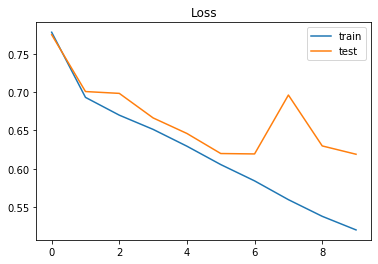

In [34]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

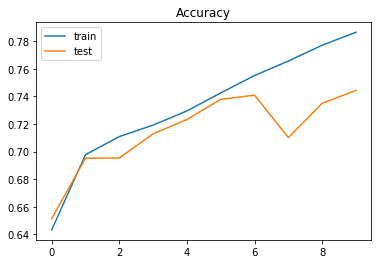

In [35]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();